In [62]:
import tensorflow as tf
from tensorflow import keras

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import hvplot.pandas

tf.__version__

'2.0.0-alpha0'

## Text Classification Example

In [4]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [7]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [8]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [11]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
len(train_data[0]), len(train_data[1])

(256, 256)

In [13]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [25]:
model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
len(train_data)

25000

In [29]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/100
15000/15000 [==============================] - 1s 45us/sample - loss: 0.6923 - accuracy: 0.5551 - val_loss: 0.6909 - val_accuracy: 0.6425
Epoch 2/100
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6883 - accuracy: 0.7219 - val_loss: 0.6855 - val_accuracy: 0.7074
Epoch 3/100
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6799 - accuracy: 0.7276 - val_loss: 0.6745 - val_accuracy: 0.7383
Epoch 4/100
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6639 - accuracy: 0.7630 - val_loss: 0.6553 - val_accuracy: 0.7505
Epoch 5/100
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6379 - accuracy: 0.7810 - val_loss: 0.6260 - val_accuracy: 0.7593
Epoch 6/100
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6013 - accuracy: 0.7951 - val_loss: 0.5884 - val_accuracy: 0.7782
Epoch 7/100
15000/15000 [=========================

In [31]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 23us/sample - loss: 0.6229 - accuracy: 0.8516
[0.6229429714703559, 0.8516]


In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
pd.DataFrame(history_dict).hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [46]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

In [47]:
epochs

range(1, 101)

In [58]:
pd.Series(acc).hvplot(title="Accuracy") * pd.Series(val_acc).hvplot(title="Accuracy")

:Overlay
   .Curve.A_0.I  :Curve   [index]   (0)
   .Curve.A_0.II :Curve   [index]   (0)

## Structured Data Walkthrough

In [61]:
url = 'https://storage.googleapis.com/applied-dl/heart.csv'
dataframe = pd.read_csv(url)
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [68]:
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print('{} train examples'.format(len(train)), '|', '{} validation examples'.format(len(val)), '|', '{} test examples'.format(len(test)))

193 train examples | 49 validation examples | 61 test examples


In [69]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [70]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [72]:
for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of ages:', feature_batch['age'])
    print('A batch of targets:', label_batch )

Every feature: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
A batch of ages: tf.Tensor([71 70 54 52 59], shape=(5,), dtype=int32)
A batch of targets: tf.Tensor([0 1 0 0 1], shape=(5,), dtype=int32)


In [73]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

In [75]:
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())

In [76]:
age = feature_column.numeric_column("age")
demo(age)

W0430 16:07:57.722256 4714251712 deprecation.py:323] From /Users/tjs/anaconda3/envs/ai/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2758: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


[[71.]
 [70.]
 [54.]
 [52.]
 [59.]]


In [77]:
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
demo(age_buckets)

W0430 16:08:10.736145 4714251712 deprecation.py:323] From /Users/tjs/anaconda3/envs/ai/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2902: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [78]:
thal = feature_column.categorical_column_with_vocabulary_list(
      'thal', ['fixed', 'normal', 'reversible'])

thal_one_hot = feature_column.indicator_column(thal)
demo(thal_one_hot)

W0430 16:08:19.538192 4714251712 deprecation.py:323] From /Users/tjs/anaconda3/envs/ai/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:4307: IndicatorColumn._variable_shape (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0430 16:08:19.539079 4714251712 deprecation.py:323] From /Users/tjs/anaconda3/envs/ai/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:4362: VocabularyListCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [79]:
# Notice the input to the embedding column is the categorical column
# we previously created
thal_embedding = feature_column.embedding_column(thal, dimension=8)
demo(thal_embedding)

[[ 0.1948821  -0.02270942 -0.16826878  0.3076677   0.27003583  0.18367533
  -0.32999727 -0.24675116]
 [ 0.07468002 -0.40683833 -0.02786528 -0.4136076   0.02977174  0.06554154
   0.23027433  0.3955214 ]
 [ 0.07468002 -0.40683833 -0.02786528 -0.4136076   0.02977174  0.06554154
   0.23027433  0.3955214 ]
 [ 0.07468002 -0.40683833 -0.02786528 -0.4136076   0.02977174  0.06554154
   0.23027433  0.3955214 ]
 [ 0.07468002 -0.40683833 -0.02786528 -0.4136076   0.02977174  0.06554154
   0.23027433  0.3955214 ]]


In [80]:
thal_hashed = feature_column.categorical_column_with_hash_bucket(
      'thal', hash_bucket_size=1000)
demo(feature_column.indicator_column(thal_hashed))

W0430 16:08:47.863734 4714251712 deprecation.py:323] From /Users/tjs/anaconda3/envs/ai/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:4362: HashedCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [81]:
crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
demo(feature_column.indicator_column(crossed_feature))

W0430 16:08:56.158509 4714251712 deprecation.py:323] From /Users/tjs/anaconda3/envs/ai/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:4362: CrossedColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [86]:
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']:
    feature_columns.append(feature_column.numeric_column(header))

# bucketized cols
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# indicator cols
thal = feature_column.categorical_column_with_vocabulary_list('thal', ['fixed', 'normal', 'reversible'])
thal_one_hot = feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

# embedding cols
thal_embedding = feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# crossed cols
crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
crossed_feature = feature_column.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

In [87]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [88]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [89]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 63ms/step - loss: 1.5234 - accuracy: 0.5659 - val_loss: 1.6700 - val_accuracy: 0.3061
Epoch 2/50
7/7 [==============================] - 0s 29ms/step - loss: 1.6855 - accuracy: 0.3682 - val_loss: 1.0593 - val_accuracy: 0.7143
Epoch 3/50
7/7 [==============================] - 0s 31ms/step - loss: 0.6211 - accuracy: 0.7262 - val_loss: 0.8644 - val_accuracy: 0.5510
Epoch 4/50
7/7 [==============================] - 0s 29ms/step - loss: 0.8177 - accuracy: 0.5324 - val_loss: 0.6059 - val_accuracy: 0.6939
Epoch 5/50
7/7 [==============================] - 0s 31ms/step - loss: 0.5395 - accuracy: 0.7216 - val_loss: 0.5539 - val_accuracy: 0.6735
Epoch 6/50
7/7 [==============================] - 0s 30ms/step - loss: 0.5435 - accuracy: 0.7873 - val_loss: 0.5416 - val_accuracy: 0.6735
Epoch 7/50
7/7 [==============================] - 0s 30ms/step - loss: 0.5245 - accuracy: 0.7493 - val_loss: 0.5457 - val_accuracy: 0.6939
Epoch 8/50
7/7 [===========

In [90]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

2/2 [==============================] - 0s 15ms/step - loss: 0.5871 - accuracy: 0.7705
Accuracy 0.7704918


## Regression Example

In [91]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0-alpha0


In [92]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 1us/step


'/Users/tjs/.keras/datasets/auto-mpg.data'

In [97]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [98]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [99]:
dataset.dropna(inplace=True)

In [100]:
origin = dataset.pop('Origin')

In [101]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [102]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

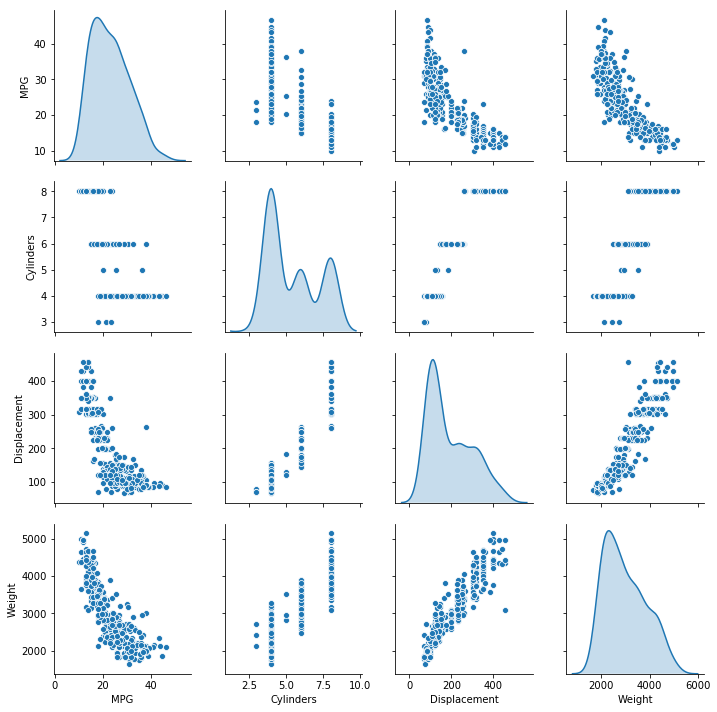

In [103]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [104]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [105]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [106]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [107]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

In [108]:
model = build_model()

In [109]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [110]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.27033406],
       [-0.5049939 ],
       [-0.59124523],
       [-0.6984962 ],
       [-0.3730248 ],
       [-0.49811405],
       [-0.410587  ],
       [-0.48766863],
       [-0.4020313 ],
       [-0.17430171]], dtype=float32)

In [111]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [112]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.813643,0.801314,1.813643,10.909673,2.449542,10.909674,995
996,2.089785,0.908703,2.089785,9.934336,2.475020,9.934336,996
997,1.974849,0.851739,1.974849,10.695463,2.644151,10.695462,997
998,2.044257,0.868176,2.044257,10.380329,2.559844,10.380329,998
999,1.888506,0.811287,1.888506,10.003297,2.419686,10.003297,999


In [136]:
hist.loc[:, ['loss', 'val_loss']].hvplot(title='loss')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [137]:
hist.loc[:, ['mae', 'val_mae']].hvplot(title='MAE')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [138]:
hist.loc[:, ['mse', 'val_mse']].hvplot(title='MSE')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [139]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



........................................................................

In [140]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
67,6.512257,1.851649,6.512257,8.298506,2.276998,8.298507,67
68,6.861329,1.866956,6.861329,8.289279,2.190816,8.289279,68
69,6.507987,1.826550,6.507987,8.275130,2.197787,8.275131,69
70,6.454005,1.821394,6.454004,8.268127,2.265001,8.268127,70
71,6.550586,1.833067,6.550586,8.122172,2.186052,8.122172,71


In [145]:
hist.loc[:, ['loss', 'val_loss']].hvplot(title='loss')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [146]:
hist.loc[:, ['mae', 'val_mae']].hvplot(title='MAE')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [147]:
hist.loc[:, ['mse', 'val_mse']].hvplot(title='MSE')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [148]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.86 MPG


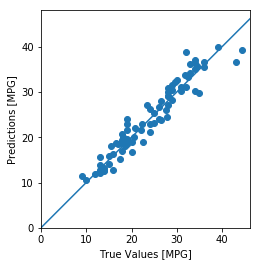

In [149]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

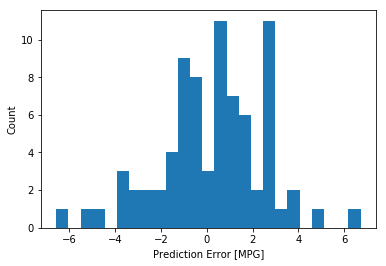

In [150]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")